## fig4_Reid Plots

In [2]:
import time, datetime
import numpy as np
from numpy import zeros, sqrt, pi, vectorize
from numpy.linalg import pinv, inv
from multiprocessing import Process, Queue
#import matplotlib
#matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
%matplotlib inline
from error_analysis_class import *
from noshellavg import *

## Initial settings 

In [357]:
#  (parameter description in class code)
# Fourier K 0.001~10
KMIN = 1e-10
KMAX = 2 # 361.32 #502.32
RMIN = 0.1
RMAX = 180

kmin = 0.01
kmax = 2

# the number of k sample point should be 2^n+1 (b/c romb integration)
rN = 200
kN_x = 1
kN = 2**10 + 1
kN_y = 1000
#subN = 2**5 + 1
# RSD class

In [358]:
RSDPower = NoShell_covariance(KMIN, KMAX, RMIN, RMAX, kN, rN, kN_x, kN_y, logscale = False)

-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1025, N_y = 1000, rN = 200
dr = 0.904020100503, dk=0.0019531249999, dk_y=0.0020020020019


In [392]:
rcut_max = get_closest_index_in_data( RMAX, RSDPower.rmax )
rcut_min = get_closest_index_in_data( RMIN, RSDPower.rmin )
kcut_min = get_closest_index_in_data( kmin, RSDPower.kmin_y )
kcut_max = get_closest_index_in_data( kmax, RSDPower.kmax_y )

Call noshell class

In [360]:
file = 'matterpower_z_0.55.dat'  # from camb (z=0.55)
RSDPower.MatterPower(file = file)
# power spectrum multipoles l = 0,2,4
RSDPower.multipole_P_band_all()

# derivative dXi/dp
RSDPower.derivative_Xi_band_all()

# derivative dXidb, s, f
RSDPower.derivative_bfs_all()
RSDPower.derivative_P_bfs_all()

# P covariance matrix ( nine submatrices C_ll' )
RSDPower.RSDband_covariance_PP_all()

# Xi covariance matrix ( nine submatrices C_ll' )
RSDPower.covariance_Xi_all()
RSDPower.covariance_PXi_All()

multiprocessing 100 %

In [361]:
matricesXi = [RSDPower.covariance00[rcut_max:rcut_min+1,rcut_max:rcut_min+1],\
              RSDPower.covariance02[rcut_max:rcut_min+1,rcut_max:rcut_min+1],\
              RSDPower.covariance04[rcut_max:rcut_min+1,rcut_max:rcut_min+1],\
              np.transpose(RSDPower.covariance02[rcut_max:rcut_min+1,rcut_max:rcut_min+1]),\
              RSDPower.covariance22[rcut_max:rcut_min+1,rcut_max:rcut_min+1],\
              RSDPower.covariance24[rcut_max:rcut_min+1,rcut_max:rcut_min+1],\
              np.transpose(RSDPower.covariance04[rcut_max:rcut_min+1,rcut_max:rcut_min+1]),\
              np.transpose(RSDPower.covariance24[rcut_max:rcut_min+1,rcut_max:rcut_min+1]),\
              RSDPower.covariance44[rcut_max:rcut_min+1,rcut_max:rcut_min+1]]

matricesPP_all = [RSDPower.covariance_PP00,RSDPower.covariance_PP02,\
                RSDPower.covariance_PP04,RSDPower.covariance_PP02,\
                RSDPower.covariance_PP22,RSDPower.covariance_PP24,\
                RSDPower.covariance_PP04,RSDPower.covariance_PP24,\
                RSDPower.covariance_PP44]

matricesPP = [RSDPower.covariance_PP00[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
            RSDPower.covariance_PP02[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
            RSDPower.covariance_PP04[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
            RSDPower.covariance_PP02[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
            RSDPower.covariance_PP22[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
            RSDPower.covariance_PP24[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
            RSDPower.covariance_PP04[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
            RSDPower.covariance_PP24[kcut_min:kcut_max+1,kcut_min:kcut_max+1],
            RSDPower.covariance_PP44[kcut_min:kcut_max+1,kcut_min:kcut_max+1]]

matricesPXi = [RSDPower.covariance_PXi00[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
             RSDPower.covariance_PXi02[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
             RSDPower.covariance_PXi04[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
             RSDPower.covariance_PXi20[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
             RSDPower.covariance_PXi22[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
             RSDPower.covariance_PXi24[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
             RSDPower.covariance_PXi40[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
             RSDPower.covariance_PXi42[kcut_min:kcut_max+1,rcut_max:rcut_min+1],\
             RSDPower.covariance_PXi44[kcut_min:kcut_max+1,rcut_max:rcut_min+1]]


Make matrices lists to construt covriance matrices



In [362]:
l1 = RSDPower.kcenter_y.size
l2 = rcut_min+1 - rcut_max
l3 = kcut_max+1 - kcut_min

In [363]:
# combining covariances
C_matrix3PP_all = CombineCovariance3(l1, matricesPP_all)
C_matrix3PP = CombineCovariance3(l3, matricesPP)
C_matrix3Xi = CombineCovariance3(l2, matricesXi)
                                 
#C_matrix3PXi = np.zeros((C_matrix3PXi.shape))
#C_matrix3PXi, C_matrix3XiP = CombineCrossCovariance3(l3, l2, matricesPXi, transpose = True)
#C_matrix3_tot = np.concatenate((np.concatenate((C_matrix3PP, C_matrix3PXi), axis=1),\
#                                np.concatenate((C_matrix3PXi.T, C_matrix3Xi), axis=1)), axis = 0)

Covariance matrices for each estimator. Suffix `_all`  covoers all k scales.  
`C_matrix3_tot`  is a combined covariance matrix. if cross-covariance is zero matrix, The combined one is optimistic.

In [364]:
# inverting matrices
from test_SNR import blockwiseInversion
FisherP_all = inv(C_matrix3PP_all)
FisherP = inv(C_matrix3PP)
FisherXi = inv(C_matrix3Xi) 
#blockwiseInversion( C_matrix3Xi, rcut_min+1-rcut_max )
#Fisher3_tot = blockwiseInversion( C_matrix3_tot, 3 * (kcut_max+1-kcut_min) )

Use **Blockwise Inversion** method to invert C_xi and combined C.  
엥 솔직히 한번에 뒤집어도 되는 거라서 blockwise inversion 안 써도 될 거 같지만....

Make derivatives. All derivative matrices consist of 3x3 sub matrices.  
Since derivatives between different multipoles becomes zero, off-diagonal sub-matrices are zero.  
Diagonal sub-matrices of P multipoles are one.  

```
derivative_P : dP0/P0, dP2/P2, dP4/P4....  
derivative_correl_avg : dXi0/P0, dXi2/P2, dXi4/P4 ....  
Deriva tives : derivatives of combined estimator. (derivative_P, derivative_correl_avg)
```

In [365]:
# derivatives
derivative_P0 = np.identity(RSDPower.kcenter_y.size)[:,kcut_min:kcut_max+1]
Pzeros = np.zeros((derivative_P0.shape))

derivative_P = np.concatenate((np.concatenate((derivative_P0, Pzeros, Pzeros),axis=1 ),\
                               np.concatenate((Pzeros, derivative_P0, Pzeros),axis=1 ),\
                               np.concatenate((Pzeros, Pzeros, derivative_P0),axis=1 )), axis=0)
Xizeros = np.zeros((RSDPower.dxip0[:,rcut_max:rcut_min+1].shape))
derivative_correl_avg = np.concatenate(( np.concatenate((RSDPower.dxip0[:,rcut_max:rcut_min+1],Xizeros,Xizeros), axis=1),\
                                        np.concatenate((Xizeros,RSDPower.dxip2[:,rcut_max:rcut_min+1],Xizeros), axis=1),\
                                        np.concatenate((Xizeros,Xizeros,RSDPower.dxip4[:,rcut_max:rcut_min+1]), axis=1)),axis=0 )
Derivatives = np.concatenate((derivative_P,derivative_correl_avg), axis=1)

Inner product of Fisher matrices and derivative matrices gives Fisher information matrices in k space from different estimators.  
These Fisher matrices include all input k and r information.  

#### Band-power Fisher matrixes from different estimators

In [366]:
#FisherBand_P = FisherP.copy()
FisherBand_P_all = FisherP_all.copy()
#FisherBand_Xi = FisherProjection_Fishergiven(derivative_correl_avg, FisherXi)
#FisherBand_tot = FisherProjection_Fishergiven(Derivatives, Fisher3_tot)

In [367]:
# Fisher reorering
re_FisherBand_P_all, _ = reordering( RSDPower, FisherBand_P_all)
#re_FisherBand_P, _ = reordering( RSDPower, FisherBand_P)
#re_FisherBand_Xi, m_P_all = reordering( RSDPower, FisherBand_Xi)
#re_FisherBand_tot, _ = reordering( RSDPower, FisherBand_tot)

## b and f Reid plot

I could reuse Fisher matrices and derivatives obtained above, but if I reorder matrices, it would be more convenient to cut out matrices by scales.

Reorder Xi covariance matrix.

In [368]:
from test_SNR import reordering, reorderingVector, blockwise
re_C_matrix3Xi, _ = reordering( RSDPower, C_matrix3Xi )

Reorder derivatives

In [393]:
# for xi
Xizeros = np.zeros((RSDPower.dxip0[:, rcut_max:rcut_min+1].shape))
dxip0 = reorderingVector([RSDPower.dxip0[:, rcut_max:rcut_min+1], Xizeros, Xizeros])
dxip2 = reorderingVector([Xizeros, RSDPower.dxip2[:, rcut_max:rcut_min+1], Xizeros])
dxip4 = reorderingVector([Xizeros, Xizeros, RSDPower.dxip4[:, rcut_max:rcut_min+1]])
dxip = np.vstack(( dxip0, dxip2, dxip4 ))

dPb = np.hstack(([RSDPower.dPb0, RSDPower.dPb2, RSDPower.dPb4]))
dPf = np.hstack(([RSDPower.dPf0, RSDPower.dPf2, RSDPower.dPf4]))
dPs = np.hstack(([RSDPower.dPs0, RSDPower.dPs2, RSDPower.dPs4]))
dPn = np.hstack(([np.ones(RSDPower.dPs0.size),np.zeros(RSDPower.dPs0.size),np.zeros(RSDPower.dPs0.size) ]))

dPbf = np.vstack(( dPb, dPf ))
dPbfs = np.vstack(( dPb, dPf, dPs ))
dPbfsn = np.vstack(( dPb, dPf, dPs, dPn ))

# for P (limited k range. but not sure these are needed for reid plots...)
dPb_cut = reorderingVector([RSDPower.dPb0[kcut_min:kcut_max+1], \
                            RSDPower.dPb2[kcut_min:kcut_max+1], \
                            RSDPower.dPb4[kcut_min:kcut_max+1]])
dPf_cut = reorderingVector([RSDPower.dPf0[kcut_min:kcut_max+1], \
                            RSDPower.dPf2[kcut_min:kcut_max+1], \
                            RSDPower.dPf4[kcut_min:kcut_max+1]])
dPbf_cut = np.vstack(( dPb_cut, dPf_cut )) #, dPs ))

Calculate fractional error of f and b.

1) bandpower from $\xi$

In [370]:
# err list
errb, errbn, errbv, errb_alldet = [], [], [], []
errf, errfn, errfv, errf_alldet = [], [], [], [] # when n marginalized
rlist = [] 

#=== First term (all scale of r) =====================

F = np.dot( np.dot(dxip, inv(re_C_matrix3Xi)), dxip.T ) 

# fs marginalized
Fparams = np.dot( np.dot(dPbfs, F), dPbfs.T )
Cparams = inv(Fparams)
sigma_b, sigma_f = Cparams[0,0], Cparams[1,1]
errb.append(np.sqrt(sigma_b)/RSDPower.b)
errf.append(np.sqrt(sigma_f)/RSDPower.f)
reverser = RSDPower.rcenter[rcut_max:rcut_min+1][::-1]
rlist.append(reverser[0])

# fsn marginalized
Fparamsn = np.dot( np.dot(dPbfsn, F), dPbfsn.T )
Cparamsn = inv(Fparamsn)
sigma_bn, sigma_fn = Cparamsn[0,0], Cparamsn[1,1]
errbn.append(np.sqrt(sigma_bn)/RSDPower.b)
errfn.append(np.sqrt(sigma_fn)/RSDPower.f)

# f marginalized
Fparamsv = np.dot( np.dot(dPbf, F), dPbf.T )
Cparamsv = inv(Fparamsv)
sigma_bv, sigma_fv = Cparamsv[0,0], Cparamsv[1,1]
errbv.append(np.sqrt(sigma_bv)/RSDPower.b)
errfv.append(np.sqrt(sigma_fv)/RSDPower.f)

# only b 
Fparams_alldet = np.dot( np.dot(dPb.reshape(1, dPb.size), F), dPb.reshape(1, dPb.size).T )
sigma_b_alldet = 1./Fparams_alldet[0][0]

print sigma_b_alldet

#sigma_b_alldet, sigma_f_alldet = Cparams_alldet[0,0], Cparams_alldet[1,1]
errb_alldet.append(np.sqrt(sigma_b_alldet)/RSDPower.b)
#err_alldet.append(np.sqrt(sigma_f_alldet)/RSDPower.f)

C = re_C_matrix3Xi.copy()
DXIP = dxip.copy()


#=== now from 2nd term =====================
for j in range(1, rcut_min + 1 - rcut_max):

    DXIP = DXIP[:, :-3 ]
    C = C[:-3, :-3 ]
    F = np.dot( np.dot(DXIP, inv(C)), DXIP.T )
    
    # shot noise determined
    Fparams = np.dot( np.dot(dPbfs, F), dPbfs.T )
    Cparams = inv(Fparams)
    sigma_b, sigma_f = Cparams[0,0], Cparams[1,1]
    errb.append(np.sqrt(sigma_b)/RSDPower.b)
    errf.append(np.sqrt(sigma_f)/RSDPower.f)

    # shot noise marginalized
    Fparamsn = np.dot( np.dot(dPbfsn, F), dPbfsn.T )
    Cparamsn = inv(Fparamsn)
    sigma_bn, sigma_fn = Cparamsn[0,0], Cparamsn[1,1]
    errbn.append(np.sqrt(sigma_bn)/RSDPower.b)
    errfn.append(np.sqrt(sigma_fn)/RSDPower.f)

    # shot noise, velocity dispersion determined
    Fparamsv = np.dot( np.dot(dPbf, F), dPbf.T )
    Cparamsv = inv(Fparamsv)
    sigma_bv, sigma_fv = Cparamsv[0,0], Cparamsv[1,1]
    errbv.append(np.sqrt(sigma_bv)/RSDPower.b)
    errfv.append(np.sqrt(sigma_fv)/RSDPower.f)

    # only b 
    Fparams_alldet = np.dot( np.dot(dPb, F), dPb.T )   
    sigma_b_alldet = 1./Fparams_alldet
    errb_alldet.append(np.sqrt(sigma_b_alldet)/RSDPower.b)
    #err_alldet.append(np.sqrt(sigma_f_alldet)/RSDPower.f)

    #rlist.append(1.15 * np.pi/klist[j])
    rlist.append(reverser[j])

2.29207953871e-06


Plotting

In [424]:
DAT = np.column_stack((rlist, errb, errbn, errbv, errb_alldet))
np.savetxt('data_txt/reid_xi_b_marginalization_comparison_Nk1000', DAT)

DAT2 = np.column_stack((rlist, errf, errfn, errfv))
np.savetxt('data_txt/reid_xi_f_marginalization_comparison_Nk1000', DAT2)

In [ ]:
data_txt/reid_xi_f_marginalization_comparison_Nk1000

2) bandpower from P

In [445]:
from test_SNR import reorderingVector
re_F =  re_FisherBand_P_all.copy()

re_dPb = reorderingVector([RSDPower.dPb0, RSDPower.dPb2, RSDPower.dPb4])
re_dPf = reorderingVector([RSDPower.dPf0, RSDPower.dPf2, RSDPower.dPf4])
re_dPs = reorderingVector([RSDPower.dPs0, RSDPower.dPs2, RSDPower.dPs4])
re_dPn = reorderingVector([np.ones(RSDPower.dPs0.size),np.zeros(RSDPower.dPs0.size),np.ones(RSDPower.dPs0.size) ])

re_dP_alldet = re_dPb.copy().reshape(1, re_dPb.size)
re_dPbf = np.vstack(( re_dPb, re_dPf )) #, dPs ))
re_dPbfs = np.vstack(( re_dPb, re_dPf, re_dPs ))
re_dPbfsn = np.vstack(( re_dPb, re_dPf, re_dPs, re_dPn ))

#D = re_dPbf.copy()

In [448]:
# from P

errPb, errPbn, errPbv, errPb_alldet = [], [], [], []
errPf, errPfn, errPfv, errPf_alldet = [], [], [], [] # when n marginalized

rlistP = []
#klist = RSDPower.kcenter_y[::-1]

# bf 
FPparams = np.dot( np.dot(re_dPbf, re_F), re_dPbf.T )      
CPparams = inv(FPparams)
sigma_Pb, sigma_Pf = CPparams[0,0], CPparams[1,1]
errPb.append(np.sqrt(sigma_Pb)/RSDPower.b)
errPf.append(np.sqrt(sigma_Pf)/RSDPower.f)

# bfs 
FPparams = np.dot( np.dot(re_dPbfs, re_F), re_dPbfs.T )      
CPparams = inv(FPparams)
sigma_Pb, sigma_Pf = CPparams[0,0], CPparams[1,1]
errPbv.append(np.sqrt(sigma_Pb)/RSDPower.b)
errPfv.append(np.sqrt(sigma_Pf)/RSDPower.f)

# bfsn 
FPparams = np.dot( np.dot(re_dPbfsn, re_F), re_dPbfsn.T )      
CPparams = inv(FPparams)
sigma_Pb, sigma_Pf = CPparams[0,0], CPparams[1,1]
errPbn.append(np.sqrt(sigma_Pb)/RSDPower.b)
errPfn.append(np.sqrt(sigma_Pf)/RSDPower.f)

# b only 
FPparams = np.dot( np.dot(re_dP_alldet, re_F), re_dP_alldet.T )      
#CPparams = inv(FPparams)
sigma_Pb = 1./Fparams[0][0]
errPb_alldet.append(np.sqrt(sigma_Pb)/RSDPower.b)
#errPf_alldet.append(np.sqrt(sigma_Pf)/RSDPower.f)


rlistP.append( 1.15 * np.pi/RSDPower.kcenter_y[::-1][0])


#bf

for j in range(1, RSDPower.kcenter_y[::-1].size ):
    # from P in r

    re_F = re_F[:-3, :-3]
    rlistP.append( 1.15 * np.pi/RSDPower.kcenter_y[::-1][j])
    
    # bf
    re_dPbf = re_dPbf[:,:-3]
    FPparams = np.dot( np.dot(re_dPbf, re_F), re_dPbf.T )
    CPparams = inv(FPparams)
    sigma_Pb, sigma_Pf = CPparams[0,0], CPparams[1,1]
    errPb.append(np.sqrt(sigma_Pb)/RSDPower.b)
    errPf.append(np.sqrt(sigma_Pf)/RSDPower.f)
    
    
    # bfs
    re_dPbfs = re_dPbfs[:,:-3]
    FPparams = np.dot( np.dot(re_dPbfs, re_F), re_dPbfs.T )
    CPparams = inv(FPparams)
    sigma_Pb, sigma_Pf = CPparams[0,0], CPparams[1,1]
    errPbv.append(np.sqrt(sigma_Pb)/RSDPower.b)
    errPfv.append(np.sqrt(sigma_Pf)/RSDPower.f)
    
    # bfsn
    re_dPbfsn = re_dPbfsn[:,:-3]
    FPparams = np.dot( np.dot(re_dPbfsn, re_F), re_dPbfsn.T )
    CPparams = inv(FPparams)
    sigma_Pb, sigma_Pf = CPparams[0,0], CPparams[1,1]
    errPbn.append(np.sqrt(sigma_Pb)/RSDPower.b)
    errPfn.append(np.sqrt(sigma_Pf)/RSDPower.f)
    
    # b only
    re_dP_alldet = re_dP_alldet[:,:-3]
    FPparams = np.dot( np.dot(re_dP_alldet, re_F), re_dP_alldet.T )
    sigma_Pb = 1./FPparams[0][0]

    errPb_alldet.append(np.sqrt(sigma_Pb)/RSDPower.b)
    #errPf.append(np.sqrt(sigma_Pf)/RSDPower.f)

In [449]:
DAT = np.column_stack((rlistP, errPb, errPbn, errPbv, errPb_alldet))
np.savetxt('data_txt/reid_p_b_marginalization_comparison_Nk1000', DAT)

DAT = np.column_stack((rlistP, errPf, errPfn, errPfv))
np.savetxt('data_txt/reid_p_f_marginalization_comparison_Nk1000', DAT)

In [222]:
# save to txt
DAT = np.column_stack(( rlist, errb, errf, rlist, errbn, errfn ))
DAT2 = np.column_stack((rlistP, errPb, errPf))
#np.savetxt('data_txt/reid_xi_default.txt', DAT)
#np.savetxt('data_txt/reid_p_default.txt', DAT2)

In [261]:
DAT = np.genfromtxt('data_txt/reid_xi_default.txt')
DAT2 = np.genfromtxt('data_txt/reid_p_default.txt')
rlist, errb, errf, rlist, errbn, errfn = [DAT[:,i] for i in range(DAT[0,:].size)]
rlistP, errPb, errPf = [DAT2[:,i] for i in range(DAT2[0,:].size)]

fig save to  figure/reid_n_linear_v2.pdf


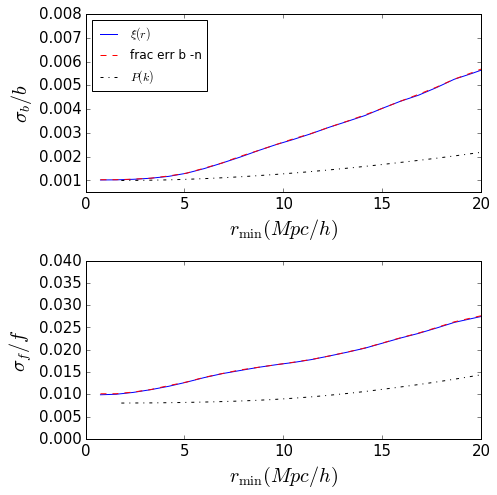

In [258]:
# plotting
fig, (ax, ax2) = plt.subplots(2,1, figsize=(7, 7))
ax.plot(rlist, errb, label = r'$\xi(r)$')
ax2.plot(rlist, errf, label = r'$\xi(r)$')
ax.plot(rlist, errbn, color = 'red', linestyle = '--', label = 'frac err b -n')
ax2.plot(rlist, errfn, color = 'red', linestyle = '--', label = 'frac err f -n')
ax.plot(rlistP, errPb, 'k-.', label = r'$P(k)$')
ax2.plot(rlistP, errPf, 'k-.', label = r'$P(k)$')
ax.set_xlim(0, 20)
ax.set_ylim(0.0005, 0.008)
ax.set_ylabel(r'$\sigma_{b}/b$', size = 20)
ax2.set_ylabel(r'$\sigma_{f}/f$',size=20)
ax.set_xlabel(r'$r_{\rm{min}} (Mpc/h)$', size = 20)
#ax.set_xlabel(r'$k_{\rm{max}} (h/Mpc)$', size = 20)
ax.set_yscale('linear')
#ax2.set_xlim(0,60)
ax2.set_xlim(0, 20)
ax2.set_ylim(0.00, 0.04)
#ax2.set_ylabel('f')
ax2.set_xlabel(r'$r_{\rm{min}} (Mpc/h)$', size = 20)
#ax2.set_xlabel(r'$k_{\rm{max}} (h/Mpc)$', size = 20)

ax.legend(loc = 'best')
#ax2.legend(loc='best')

ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
plt.tight_layout()
#ax.set_title(' from F_bandpower ')
#figname = 'figure/reid.pdf'
figname = 'figure/reid_n.pdf'
#fig.savefig(figname)
print 'fig save to ', figname

In [450]:
errorb_P_dat = np.genfromtxt('data_txt/reid_p_b_marginalization_comparison_Nk1000')
errorb_Xi_dat = np.genfromtxt('data_txt/reid_xi_b_marginalization_comparison_Nk1000')
rlistP, errPb, errPbn, errPbv, errPb_alldet = [errorb_P_dat[:,q] for q in range(errorb_P_dat[0,:].size) ]
rlist, errb, errbn, errbv, errb_alldet = [errorb_Xi_dat[:,q] for q in range(errorb_Xi_dat[0,:].size) ]

errorf_P_dat = np.genfromtxt('data_txt/reid_p_f_marginalization_comparison_Nk1000')
errorf_Xi_dat = np.genfromtxt('data_txt/reid_xi_f_marginalization_comparison_Nk1000')
_, errPf, errPfn, errPfv = [errorf_P_dat[:,q] for q in range(errorf_P_dat[0,:].size) ]
_, errf, errfn, errfv = [errorf_Xi_dat[:,q] for q in range(errorf_Xi_dat[0,:].size) ]

In [438]:
r_interp = np.linspace(rlistP.min(), rlist.max(), 100)

fig save to  figure/reid_n_linear_v2.pdf


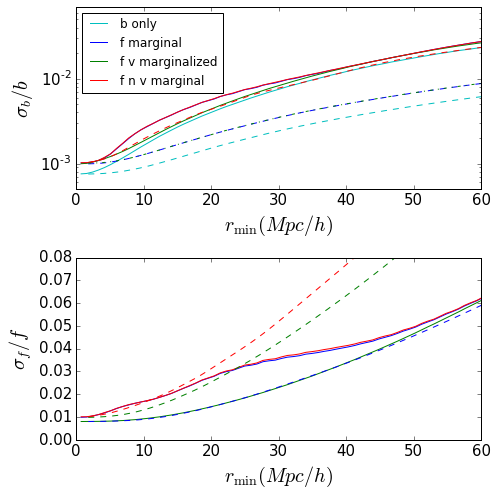

In [451]:
# plotting
fig, (ax, ax2) = plt.subplots(2,1, figsize=(7, 7))

ax.plot(rlist, errb_alldet, 'c-',label='b only')
ax.plot(rlist, errb, 'b-',label='f marginal')
ax.plot(rlist, errbv, 'g-',label='f v marginalized')
ax.plot(rlist, errbn, 'r-',  label='f n v marginal')


ax.plot(rlistP[1:], errPb_alldet[1:], 'c--')
ax.plot(rlistP, errPb, 'b--')
ax.plot(rlistP, errPbn, 'r--')
ax.plot(rlistP, errPbv, 'g-.')




ax2.plot(rlist, errf, 'b-',label='f marginal')
ax2.plot(rlist, errfv, 'g-',label='f v marginalized')
ax2.plot(rlist, errfn, 'r-',  label='f n v marginal')

ax2.plot(rlistP, errPf, 'b--')
ax2.plot(rlistP, errPfv, 'g--')
ax2.plot(rlistP, errPfn, 'r--')

ax.set_xlim(0, 60)
ax.set_ylim(0.0005, 0.07)
ax.set_ylabel(r'$\sigma_{b}/b$', size = 20)
ax2.set_ylabel(r'$\sigma_{f}/f$',size=20)
ax.set_xlabel(r'$r_{\rm{min}} (Mpc/h)$', size = 20)
#ax.set_xlabel(r'$k_{\rm{max}} (h/Mpc)$', size = 20)
ax.set_yscale('log')
#ax2.set_xlim(0,60)
ax2.set_xlim(0, 60)
ax2.set_ylim(0.00, 0.08)
#ax2.set_ylabel('f')
ax2.set_xlabel(r'$r_{\rm{min}} (Mpc/h)$', size = 20)
#ax2.set_xlabel(r'$k_{\rm{max}} (h/Mpc)$', size = 20)

ax.legend(loc = 'best')
#ax2.legend(loc='best')

ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
plt.tight_layout()
#ax.set_title(' from F_bandpower ')
#figname = 'figure/reid.pdf'
#figname = 'figure/reid_n.pdf'
#fig.savefig(figname)
print 'fig save to ', figname

----

In [377]:
ax.plot(rlist, errb_alldet, 'c-',label='b only')
ax.plot(rlist, errbv, 'b-',label='f marginal')
ax.plot(rlist, errb, 'g-',label='f v marginalized')
ax.plot(rlist, errbn, 'r-',  label='f v n marginal')



from scipy import interpolate
errPb_itp = interpolate.interp1d(rlistP, errPb)
errPbn_itp = interpolate.interp1d(rlistP, errPbn)
errPbv_itp = interpolate.interp1d(rlistP, errPbv)
errPb_alldet_itp = interpolate.interp1d(rlistP, errPb_alldet)

errb_itp = interpolate.interp1d(rlist, errb)
errbn_itp = interpolate.interp1d(rlist, errbn)
errbv_itp = interpolate.interp1d(rlist, errbv)
errb_alldet_itp = interpolate.interp1d(rlist, errb_alldet)

In [341]:
r_pivot = 18.0
ratio_b = errb_itp(r_pivot)/errPb_itp(r_pivot)
ratio_bn = errbn_itp(r_pivot)/errPbn_itp(r_pivot)
ratio_bv = errbv_itp(r_pivot)/errPbv_itp(r_pivot)
ratio_b_alldet = errb_alldet_itp(r_pivot)/errPb_alldet_itp(r_pivot)

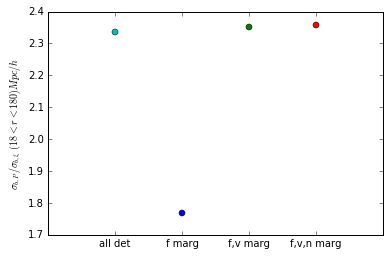

In [378]:
fig, ax = plt.subplots()
ax.plot(1, ratio_b_alldet,'co')
ax.plot(2, ratio_bv, 'bo')
ax.plot(3, ratio_b,'go')
ax.plot(4, ratio_bn,'ro')

ax.set_xlim(0,5)
ax.set_ylabel(r'$\sigma_{b,P} / \sigma_{b, \xi}$ $(18 < r < 180) Mpc/h$')
ax.set_xticklabels(['','all det', 'f marg', 'f,v marg', 'f,v,n marg' ,''])